# **Descarga del dataset**

In [ ]:
import kagglehub

# Downoad latest version
path1 = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path1)

Path to dataset files: /kaggle/input/fashionmnist


# **Parte 1 - Reducción de dimensionalidad (solo pre-procesamiento)**

El objetivo es realizar una reducción de dimensionalidad a través de PCA conservando el 95% de la varianza a un dataset. El dataset que se ocupará es Fashion MNIST el cual posee 60.000 ejemplos de prendas de vestir codificadas en 28x28 pixeles en escalas de grises.

Partiremos cargando de las librerías necesarias para la reducción de dimensionalidad y visualización.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Carguemos el dataset y hagamos una visualización de sus primeras 5 filas para ver su estructura y si es necesario realizar algún arreglo.

In [ ]:
df1 = pd.read_csv(path1 + '/fashion-mnist_train.csv')
print(df1.head())
df1.shape

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

(60000, 785)

Ahora veamos si el dataset posee datos nulos para corregirlos.

In [ ]:
nulos = df1.isnull().any().any()
print(f"¿Hay algún valor nulo en el DataFrame? {nulos}")

¿Hay algún valor nulo en el DataFrame? False


Procedemos a eliminar la primera columna del dataset, ya que esta corresponde a una codificación para saber el tipo de vestimenta y no aporta información en la reducción de los datos.

In [ ]:
df1 = df1.drop(columns=['label'])

Lo primero que debemos hacer antes de realizar la reduccion de dimensionalidad a través de PCA es estandarizar los datos para que así las variables con una dimensionalidad alta no dominen el análisis y las de baja dimensionalidad se vean representadas.

In [ ]:
scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(df1)

Ahora podemos aplicar PCA. En este caso buscamos conservar el 95% de la varianza de los datos.

In [ ]:
pca = PCA(n_components=0.95)
X_pca_1 = pca.fit_transform(X_scaled_1)

In [ ]:
X_pca_1.shape

(60000, 256)

Notemos que luego de aplicar PCA las imagenes se ven representadas a través de 256 componentes que explican el 95% de la varianza de los datos.

Procedamos a visualizar las componentes principales de la reducción realizada por PCA. Estas permiten entender como las caracteristicas originales se combinan linealmente para formar los nuevos componentes reducidos.

In [ ]:
pca.components_

array([[ 0.00031395,  0.00088127,  0.00149325, ...,  0.0064913 ,
         0.0014661 ,  0.0006676 ],
       [ 0.00017932,  0.0014502 ,  0.00115874, ...,  0.0140834 ,
         0.00961568,  0.00409087],
       [ 0.00011493,  0.00085995,  0.00188652, ...,  0.00893996,
        -0.00232472, -0.00124449],
       ...,
       [-0.02489535,  0.04248402, -0.00491171, ..., -0.01958045,
         0.05528764, -0.05775233],
       [-0.00171487, -0.01212216,  0.02063736, ...,  0.01992995,
         0.04327893,  0.01432107],
       [-0.01670649,  0.02860561, -0.05222822, ..., -0.03128197,
         0.04455644, -0.00301969]])

Lo siguiente nos mostrará cuanta varianza está explicando cada componente principal ordenadas de mayor a menor. Esto nos ayuda a visualizar cuantas componentes seleccionar. En este caso, como le pedimos que conserve el 95% de la varianza selecciona el mínimo número de componentes que juntas cumplan el 95%.

In [ ]:
pca.explained_variance_ratio_

array([0.22057176, 0.14395563, 0.05458802, 0.05116399, 0.04069273,
       0.03012154, 0.02750481, 0.02325871, 0.01694438, 0.01309833,
       0.01161488, 0.00963108, 0.00890642, 0.00856623, 0.00743049,
       0.00730157, 0.00657498, 0.00632692, 0.00623657, 0.0058046 ,
       0.00515707, 0.00511548, 0.00472764, 0.00453557, 0.00438423,
       0.00416784, 0.00395056, 0.00393244, 0.00378355, 0.00374478,
       0.00368528, 0.00353646, 0.00336422, 0.00330015, 0.00329434,
       0.00319736, 0.00305999, 0.00293714, 0.00289203, 0.00280918,
       0.00271998, 0.00265986, 0.00255732, 0.00253773, 0.00245191,
       0.00243254, 0.0023872 , 0.00228126, 0.00223339, 0.00215709,
       0.00212645, 0.00209085, 0.0020228 , 0.00201541, 0.00199305,
       0.00195332, 0.00191017, 0.00185777, 0.00181596, 0.00178264,
       0.00175763, 0.00173528, 0.00170987, 0.00167605, 0.00161354,
       0.00157432, 0.00154656, 0.00150991, 0.00148749, 0.00146464,
       0.00144441, 0.00143189, 0.00142557, 0.00140266, 0.00137

Por último, reconstruyamos las imagenes y visualicemoslas, esto para evaluar visualmente la calidad de la reducción de dimensionalidad. Así, podremos ver si la información visual crucial para distinguir las prendas se mantiene, es decir que tan bien funcinó la reducción.

Para esto revertiremos el proceso de proyeccion de PCA a través de "pca.inverse_transform()". Así visualizaremos una comparación entre las imágenes originales y las reconstruidas (tomaremos solo las primeras 10).

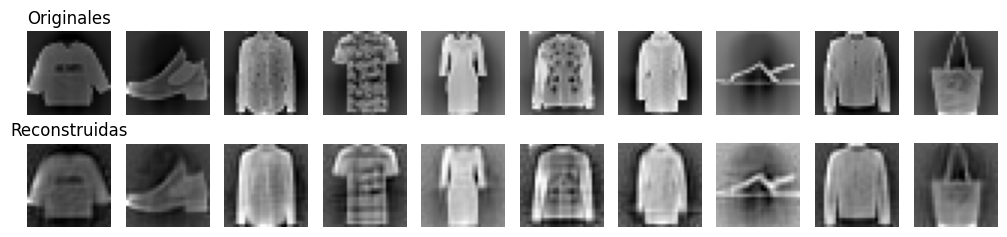

In [ ]:
X_reconstructed_1 = pca.inverse_transform(X_pca_1)

fig, axes = plt.subplots(2, 10, figsize=(10, 2.5))
for i in range(10):
    axes[0, i].imshow(X_scaled_1[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(X_reconstructed_1[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_title("Originales")
axes[1, 0].set_title("Reconstruidas")
plt.tight_layout()
plt.show()

Notemos que pese a la reducción de dimensionalidad, las imagenes reconstruidas no pierden la información, puesto que se siguen distinguiendo las prendas, solo que tienen una menor calidad.

# **Parte 2 - Modelado sobre datos en bruto y reducidos**

El objetivo es aplicar los modelos supervisados Logistic Regresion, SVM y k-NN con y sin PCA para comparar sus rendimientos y utilidades.

## **Modelo 1: Logistic Regresion**

Partamos cargando los datasets y las librerías necesarias.



In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df1_train = pd.read_csv(path1 + '/fashion-mnist_train.csv')
df1_test = pd.read_csv(path1 + '/fashion-mnist_test.csv')

df1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


Antes de todo veamos si los datos poseen nulos ya que esto provoca que los modelos no funcionen.

In [ ]:
nulos1 = df1_train.isnull().any().any()
nulos2 = df1_test.isnull().any().any()
print(f"¿Hay algún valor nulo en el DataFrame de entrenamiento? {nulos1}")
print(f"¿Hay algún valor nulo en el DataFrame de prueba? {nulos2}")

¿Hay algún valor nulo en el DataFrame de entrenamiento? False
¿Hay algún valor nulo en el DataFrame de prueba? False


Separemos entre variables objetivo y las variables que definen los pixeles.

In [ ]:
X_tr = df1_train.drop(columns=['label'])
y_tr = df1_train['label']

X_te = df1_test.drop(columns=['label'])
y_te = df1_test['label']

Veamos la distribución de frecuencia de las distintas prendas de vestir para ver la necesidad de balancear las clases y así no hayan algunas que se vean mayormente representadas y otras que no.

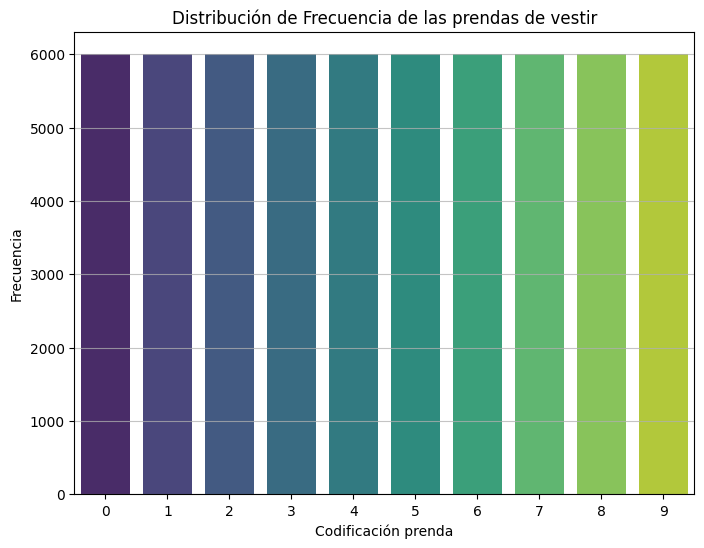

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_tr, palette='viridis')
plt.title('Distribución de Frecuencia de las prendas de vestir')
plt.xlabel('Codificación prenda')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

Dado que las clases están balanceadas, no es necesario aplicar técnicas de balanceo, ya que el modelo no se verá afectado por un desbalance en la distribución de clases.

Sin reducción PCA:

Contruyamos el pipeline del modelo. Notemos que como el dataset es de imágenes todas las variables son numéricas por lo que solo aplicaremos Standard Scaler para optimizar el modelo.

In [ ]:
pipe_log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(random_state=42, # Semilla
                                    max_iter=1000, # Maximo de iteraciones
                                    solver='liblinear', # Metodo de optimizacion
                                    penalty = 'l1', # Funcion de penalizacion
                                    C = 0.1 # Parametro de regularizacion
                                    ))
])

Procedamos a entrenar el modelo.

In [ ]:
pipe_log_reg.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.1, max_iter=1000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

Una vez entrenado el modelo, continuamos con la realización de la predicción.

In [ ]:
y_pred_log = pipe_log_reg.predict(X_te)

Por últimos procedemos a mostrar las métricas para poder concluir que tan bien actuó el modelo.

In [ ]:
print(confusion_matrix(y_te, y_pred_log))
print(classification_report(y_te, y_pred_log))

[[822   3  15  48   1   5  87   0  19   0]
 [  3 972   2  16   0   2   5   0   0   0]
 [ 17   2 781   8 112   0  71   0   9   0]
 [ 30  18  16 886  23   1  23   0   3   0]
 [  2   1  73  31 810   1  78   0   4   0]
 [  2   1   0   2   0 918   0  49   9  19]
 [164   5 109  43  86   2 568   1  22   0]
 [  0   0   0   0   0  43   0 915   1  41]
 [  5   0   6  15   3   9  15   4 943   0]
 [  0   0   0   0   0  13   0  40   0 947]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.97      0.97      0.97      1000
           2       0.78      0.78      0.78      1000
           3       0.84      0.89      0.86      1000
           4       0.78      0.81      0.80      1000
           5       0.92      0.92      0.92      1000
           6       0.67      0.57      0.62      1000
           7       0.91      0.92      0.91      1000
           8       0.93      0.94      0.94      1000
           9       0.94     

Con reducción PCA:

Construyamos el pipeline del modelo ahora agregando la reducción de dimensionalidad.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pipe_log_reg_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('log_reg', LogisticRegression(random_state=42, # Semilla
                                    max_iter=1000, # Maximo de iteraciones
                                    solver='liblinear', # Metodo de optimizacion
                                    penalty = 'l1', # Funcion de penalizacion
                                    C = 0.1 # Parametro de regularizacion
                                    ))
])

Procedamos a entrenar el modelo con reducción PCA.

In [ ]:
pipe_log_reg_pca.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('log_reg',
                 LogisticRegression(C=0.1, max_iter=1000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

Luego, realicemos la predicción del modelo.

In [ ]:
y_pred_log_pca = pipe_log_reg_pca.predict(X_te)

In [ ]:
print(confusion_matrix(y_te, y_pred_log_pca))
print(classification_report(y_te, y_pred_log_pca))

[[816   2  14  57   0   3  89   0  19   0]
 [  3 972   3  14   1   2   4   1   0   0]
 [ 14   2 783  12 114   0  63   0  11   1]
 [ 28  19  17 885  25   0  25   0   1   0]
 [  2   1  77  35 804   1  77   1   2   0]
 [  3   0   0   0   0 919   1  47  11  19]
 [168   3 114  47  86   2 560   1  19   0]
 [  0   0   0   0   0  44   0 906   1  49]
 [  4   0   7  10   4   7  20   4 943   1]
 [  0   0   0   0   0  16   0  39   0 945]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.97      0.97      0.97      1000
           2       0.77      0.78      0.78      1000
           3       0.83      0.89      0.86      1000
           4       0.78      0.80      0.79      1000
           5       0.92      0.92      0.92      1000
           6       0.67      0.56      0.61      1000
           7       0.91      0.91      0.91      1000
           8       0.94      0.94      0.94      1000
           9       0.93     

## **Modelo 2: SVM**

Partamos cargando las librerías necesarias.

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

Como ya separamos los datos procedamos a hacer los pipelines de los modelos.

Sin reducción PCA:

Construyamos el pipeline del modelo sin reducción de dimensionalidad.

In [ ]:
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42,
                C=0.1,
                kernel='rbf',
                gamma='scale'
                ))
])

Continuemos con el entrenamiento del modelo.

In [ ]:
pipe_svm.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=0.1, random_state=42))])

Ahora seguimos con la predicción del modelo.

In [ ]:
y_pred_svm = pipe_svm.predict(X_te)

Por último veremos las métricas para evaluar que tan buena fue la predicción.

In [ ]:
print(confusion_matrix(y_te, y_pred_svm))
print(classification_report(y_te, y_pred_svm))

[[822   0   7  63   0   2  80   0  26   0]
 [  5 961   4  22   1   1   5   0   1   0]
 [  9   0 767  12 121   1  75   0  15   0]
 [ 25   5   9 914  20   0  25   0   2   0]
 [  1   0  51  32 837   0  72   0   7   0]
 [  2   0   0   1   0 911   0  48  13  25]
 [191   0  96  38  72   0 573   0  30   0]
 [  0   0   0   0   0  33   0 901   0  66]
 [  1   0   3   4   3   4  13   2 969   1]
 [  0   0   0   0   0  17   0  43  11 929]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.99      0.96      0.98      1000
           2       0.82      0.77      0.79      1000
           3       0.84      0.91      0.88      1000
           4       0.79      0.84      0.81      1000
           5       0.94      0.91      0.93      1000
           6       0.68      0.57      0.62      1000
           7       0.91      0.90      0.90      1000
           8       0.90      0.97      0.93      1000
           9       0.91     

Con reducción PCA:

Construyamos el pipeline del modelo ahora agregando la reducción de dimensionalidad.

In [ ]:
pipe_svm_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('svm', SVC(random_state=42,
                C=0.1,
                kernel='rbf',
                gamma='scale'
                ))
])

Procedemos a entrenar el modelo con reducción PCA.

In [ ]:
pipe_svm_pca.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('svm', SVC(C=0.1, random_state=42))])

Se sigue con la predicción del modelo

In [ ]:
y_pred_svm_pca = pipe_svm_pca.predict(X_te)

Por último mostramos las métricas para evaluar la predicción

In [ ]:
print(confusion_matrix(y_te, y_pred_svm_pca))
print(classification_report(y_te, y_pred_svm_pca))

[[825   0   7  64   0   2  77   0  25   0]
 [  5 961   4  22   1   1   5   0   1   0]
 [  9   0 775  12 117   1  72   0  14   0]
 [ 25   5  10 916  20   0  22   0   2   0]
 [  1   0  52  32 832   0  76   0   7   0]
 [  2   0   0   1   0 901   0  59  12  25]
 [192   0  94  38  74   0 572   0  30   0]
 [  0   0   0   0   0  31   0 901   0  68]
 [  2   0   5   4   2   4  10   2 970   1]
 [  0   0   0   0   0  17   0  42  10 931]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.99      0.96      0.98      1000
           2       0.82      0.78      0.80      1000
           3       0.84      0.92      0.88      1000
           4       0.80      0.83      0.81      1000
           5       0.94      0.90      0.92      1000
           6       0.69      0.57      0.62      1000
           7       0.90      0.90      0.90      1000
           8       0.91      0.97      0.94      1000
           9       0.91     

## **Modelo 3: k-NN**

Partamos cargando las librerías necesarias.

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

Al igual que en el ejercicio anterior, como ya cargamos el dataset y se hizo el split de los datos procedemos a construir los pipelines de los modelos.

Sin reducción PCA:

In [ ]:
# Hcerlo con grilla
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3,
                                 p=2,
                                 metric='minkowski'
                                 ))
])

Entrenamiento del modelo.

In [ ]:
pipe_knn.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

Continuamos con la predicción.

In [ ]:
y_pred_knn = pipe_knn.predict(X_te)

Por último veamos las métricas para evaluar que tan bien predijo el modelo

In [ ]:
print(confusion_matrix(y_te, y_pred_knn))
print(classification_report(y_te, y_pred_knn))

[[866   1  12  13   1   0 101   1   5   0]
 [  5 973   3  12   2   0   5   0   0   0]
 [ 23   2 800  12  90   0  72   0   1   0]
 [ 43  10  14 873  30   0  30   0   0   0]
 [  8   0 118  29 767   0  77   0   1   0]
 [  3   0   1   1   0 845   3  88   2  57]
 [194   1 107  20  55   0 619   0   4   0]
 [  0   0   0   0   0   6   0 941   0  53]
 [  8   2  14   2   6   1  19   4 941   3]
 [  1   0   0   0   0   4   0  31   0 964]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1000
           1       0.98      0.97      0.98      1000
           2       0.75      0.80      0.77      1000
           3       0.91      0.87      0.89      1000
           4       0.81      0.77      0.79      1000
           5       0.99      0.84      0.91      1000
           6       0.67      0.62      0.64      1000
           7       0.88      0.94      0.91      1000
           8       0.99      0.94      0.96      1000
           9       0.90     

Con redución PCA:

Ahora, procedemos a aplicar reducción de dimensionalidad PCA dentro del modelo.

In [ ]:
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('knn', KNeighborsClassifier(n_neighbors=3,
                                 p=2,
                                 metric='minkowski'
                                 ))

])

Realizamos el entrenamiento del modelo.

In [ ]:
pipe_knn.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

Seguimos con la predicción.

In [ ]:
y_pred_knn_pca = pipe_knn.predict(X_te)

Por último veamos las métricas para evaluar si la predicción del modelo resultó ser una buena predicción.

In [ ]:
print(confusion_matrix(y_te, y_pred_knn_pca))
print(classification_report(y_te, y_pred_knn_pca))

[[860   1  14  14   1   0 105   1   4   0]
 [  4 973   1  15   2   0   5   0   0   0]
 [ 21   2 781  12 106   0  77   0   1   0]
 [ 38   6  18 886  31   0  20   0   1   0]
 [  7   0 101  26 792   0  73   0   1   0]
 [  1   0   1   1   0 885   1  62   2  47]
 [185   1  92  21  63   0 633   0   5   0]
 [  0   0   0   0   0  12   0 939   0  49]
 [  8   1  12   2   5   1  16   4 948   3]
 [  1   0   0   0   0   6   0  33   0 960]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.77      0.78      0.77      1000
           3       0.91      0.89      0.90      1000
           4       0.79      0.79      0.79      1000
           5       0.98      0.89      0.93      1000
           6       0.68      0.63      0.66      1000
           7       0.90      0.94      0.92      1000
           8       0.99      0.95      0.97      1000
           9       0.91     

## Tabla Comparativa de Modelos

| Modelo                      | Reducción | Precision | Recall | F1-score | Accuracy | Tiempo de Ejecución |
|-----------------------------|-----------|-----------------------|--------------------|----------------------|----------|---------------------|
| Logistic Regression         | Sin PCA   | 0.85                  | 0.86               | 0.85                 | 0.86     |                     |
| Logistic Regression         | Con PCA   | 0.85                  | 0.85               | 0.85                 | 0.85     |                     |
| SVM                         | Sin PCA   | 0.86                  | 0.86               | 0.86                 | 0.86     |                     |
| SVM                         | Con PCA   | 0.86                  | 0.86               | 0.86                 | 0.86     |                     |
| k-NN                        | Sin PCA   | 0.86                  | 0.86               | 0.86                 | 0.86     |                     |
| k-NN                        | Con PCA   | 0.87                  | 0.87               | 0.87                 | 0.87     |                     |



Los tres modelos tuvieron un rendimiento general similar en términos de Accuracy (alrededor del 86-87%). Sin embargo, al observar las métricas promedio, k-NN con reducción PCA mostró métricas ligeramente superiores en Precision, Recall, F1-score y Accuracy (0.87 en todos los casos).

Para el dataset Fashion MNIST, la reducción de dimensionalidad con PCA al 95% de varianza fue exitosa en reducir el número de características (de 784 a 256) sin una pérdida significativa de información relevante para la clasificación. Esto se refleja en el rendimiento muy similar de los modelos con y sin PCA.

La reducción de dimensionalidad es valiosa aquí principalmente para reducir el tiempo de entrenamiento y la complejidad computacional, sin sacrificar la precisión.

Los modelos no paramétricos como k-NN parecen beneficiarse ligeramente de la reducción, aunque las diferencias son marginales.

Mejor Modelo: Basado en las métricas de la tabla, el k-NN con reducción PCA tuvo un rendimiento ligeramente mejor.

Sin embargo, dado que las diferencias son mínimas, la Regresión Logística con reducción PCA también podría considerarse una excelente opción debido a su menor complejidad computacional en comparación con SVM y k-NN para datasets grandes.